In [1]:
using Plots, TaylorSeries, LinearAlgebra

In [2]:
function Newton(f::Function,x0::Taylor1,p0::Float64)
    x_new = x0
    i = 1
    while i <= 30 && abs(f(x_new(0.0),p0)) > 1.e-16
        x_old = x_new
        x_new = x_old - (f(x_old,p0)/derivative(f(x_old,p0)))(0.0)
        i+=1
    end
    return x_new(0.0)
end

Newton (generic function with 1 method)

In [27]:
function Newton(f::Function,x0::Union{Float64,Vector{Float64}},p0::Taylor1)
    p_new = p0
    i = 1
    while i <= 30 && abs(f(x0,p_new(0.0))) > 1.e-16
        p_old = p_new
        p_new = p_old - (f(x0,p_old)/derivative(f(x0,p_old)))(0.0)
        i+=1
    end
    return p_new(0.0)
end

Newton (generic function with 2 methods)

In [28]:
x_p(f::Function, x::Float64, p::Float64, orden::Int64) = -derivative(f(x,p+Taylor1(orden)))(0.0)/derivative(f(x+Taylor1(orden),p))(0.0)

x_p (generic function with 1 method)

In [41]:
function primer_paso(f::Function,x_ini::Float64,p_ini::Float64,p_fin::Float64,orden::Int64)
    t = Taylor1(orden)

    x_s = 1/sqrt(1/(x_p(f,x_ini,p_ini,orden)^2) + 1)
    p_s = sign(p_fin - p_ini)/sqrt(x_p(f,x_ini,p_ini,orden)^2 + 1)

    return x_s, p_s

end

primer_paso (generic function with 2 methods)

In [48]:
function paso(f::Function,x_ini::Float64, p_ini::Float64, x_s::Float64,p_s::Float64,orden::Int64)
    t = Taylor1(orden)
    
    f_x = derivative(f(x_ini+t,p_ini))(0.0)
    f_p = derivative(f(x_ini,p_ini+t))(0.0)

    A = [f_x f_p;
         x_s p_s]

    b = transpose([0 1])

    x_s_new, p_s_new = A\b

    return x_s_new, p_s_new
end

paso (generic function with 1 method)

In [136]:
function Estabilidad(f::Function, x_ini::Float64, p_ini::Float64, Δs::Float64, p_fin::Float64,orden::Int64) 
    N = floor(Int64,abs(p_fin - p_ini)/Δs)
        
    X = Float64[]
    P = Float64[]

    t = Taylor1(orden)

    push!(P,p_ini)
    push!(X,x_ini)

    x_s_new, p_s_new = primer_paso(f, x_ini, p_ini, p_fin,orden)
    x_old = x_ini + x_s_new*Δs
    p_old = p_ini + p_s_new*Δs

    
    x_new = Newton(f,x_old + t,p_old)
    p_new = Newton(f,x_new,p_old + t)
    if abs(f(x_new,p_new)) <= 1.e-16
        push!(P,p_new)
        push!(X,x_new)
        x_old = x_new
        p_old = p_new
        x_s_old = x_s_new
        p_s_old = p_s_new
    else
        throw(ArgumentError("No se pudo calcular el primer paso, prueba con valores iniciales distintos"))
    end

    i = 0

    while i <= 3*N && p_ini <= p_old <= p_fin && i <= 10000
        x_s_new, p_s_new = paso(f, x_old, p_old, x_s_old, p_s_old ,orden)
        x_old += x_s_new*Δs
        p_old += p_s_new*Δs
        x_new = Newton(f,x_old + t,p_old)
        p_new = Newton(f,x_new,p_old + t)
        push!(P,p_new)
        push!(X,x_new)
        x_old = x_new
        p_old = p_new
        x_s_old = x_s_new
        p_s_old = p_s_new
        i+=1  
    end

    return P[1:end-1],X[1:end-1]

end

Estabilidad (generic function with 1 method)

In [125]:
g(u,λ) = (u^2-1)*(u^2-4) + λ*u^2*exp(u/10)

g (generic function with 1 method)

In [128]:
x_ini = 2.0

Δs= 0.001
p_ini = 0.0
p_fin = 1.0
orden = 10

P, X = Estabilidad(g, x_ini, p_ini, Δs, p_fin,orden)

i = 0	 Δx <= Δs = true
i = 1	 Δx <= Δs = true
i = 2	 Δx <= Δs = true
i = 3	 Δx <= Δs = true
i = 4	 Δx <= Δs = true
i = 5	 Δx <= Δs = true
i = 6	 Δx <= Δs = true
i = 7	 Δx <= Δs = true
i = 8	 Δx <= Δs = true
i = 9	 Δx <= Δs = true
i = 10	 Δx <= Δs = true
i = 11	 Δx <= Δs = true
i = 12	 Δx <= Δs = true
i = 13	 Δx <= Δs = true
i = 14	 Δx <= Δs = true
i = 15	 Δx <= Δs = true
i = 16	 Δx <= Δs = true
i = 17	 Δx <= Δs = true
i = 18	 Δx <= Δs = true
i = 19	 Δx <= Δs = true
i = 20	 Δx <= Δs = true
i = 21	 Δx <= Δs = true
i = 22	 Δx <= Δs = true
i = 23	 Δx <= Δs = true
i = 24	 Δx <= Δs = true
i = 25	 Δx <= Δs = true
i = 26	 Δx <= Δs = true
i = 27	 Δx <= Δs = true
i = 28	 Δx <= Δs = true
i = 29	 Δx <= Δs = true
i = 30	 Δx <= Δs = true
i = 31	 Δx <= Δs = true
i = 32	 Δx <= Δs = true
i = 33	 Δx <= Δs = true
i = 34	 Δx <= Δs = true
i = 35	 Δx <= Δs = true
i = 36	 Δx <= Δs = true
i = 37	 Δx <= Δs = true
i = 38	 Δx <= Δs = true
i = 39	 Δx <= Δs = true
i = 40	 Δx <= Δs = true
i = 41	 Δx <= Δs = true
i 

([0.0, 0.0009261807322462675, 0.0022205072353873737, 0.002883137136531976, 0.004177321341168263, 0.004839878222493222, 0.006133919595062899, 0.006796403182438273, 0.008090301186285079, 0.008752711203990505  …  0.010021528127010394, 0.009315779673564844, 0.007946075405320554, 0.007240285858427033, 0.005870502024629936, 0.005164671600917789, 0.0037948086206432653, 0.0030889375351653386, 0.0017189958244431315, 0.0010130842906911346], [2.0, 1.9996228513380172, 1.9990955599108067, 1.9988255090357365, 1.9982978679722592, 1.9980276378373416, 1.997499646096962, 1.9972292361682011, 1.9967008927051915, 1.996430302445975  …  1.0018536871724764, 1.0017226329820226, 1.0014685075442795, 1.001337674572305, 1.0010839776955087, 1.000953365160938, 1.0007000953335088, 1.0005697024596107, 1.0003168581783684, 1.0001866841927234])

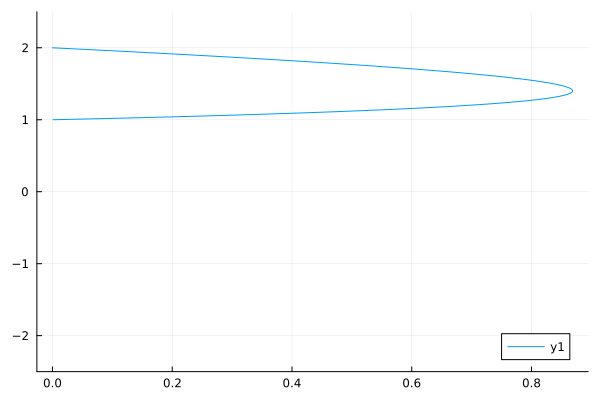

In [129]:
plot(P,X)
ylims!(-2.5,2.5)

In [65]:
maximum(P)

0.8686612702838602

In [130]:
maximum(P)

0.8686610081268389

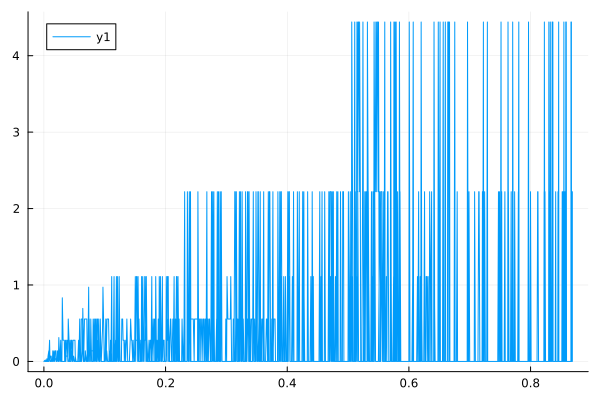

In [135]:
plot(P,abs.(g.(X,P)*1.e16))